In [1]:
library(rGADEM)
library(BSgenome.Hsapiens.UCSC.hg38)
library(GenomicRanges)
library(rtracklayer)
library(Biostrings)
library("motifStack")  # for PWM similarity
library("seqLogo")
library(universalmotif)
# library(MotiV)

Loading required package: Biostrings

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: XVector

Loading req

In [2]:
# list.files()

down = import('the.matrix.peaks_and_counts.method1.combined_peak_DESeq2_results.downregulated_peaks.log2FC.0.5.padj.0.1.bed', format='BED')
up = import('the.matrix.peaks_and_counts.method1.combined_peak_DESeq2_results.upregulated_peaks.log2FC.0.5.padj.0.1.bed', format="BED")

length(down)
length(up)

# Print initial statistics
cat("Initial peak counts:\n")
cat("Downregulated peaks:", length(down), "\n")
cat("Upregulated peaks:", length(up), "\n")

# Remove regions that are outside valid chromosome ranges
valid_chromosomes <- paste0("chr", c(1:22, "X", "Y", "M"))

# Extract sequences with bedtools
# bedtools getfasta -fi genome.fa -bed fixed_peaks.bed -fo peaks.fa

[1] 4301

[1] 4137

Initial peak counts:
Downregulated peaks: 4301 
Upregulated peaks: 4137 


In [3]:
# Get sequences directly
down_seq <- getSeq(BSgenome.Hsapiens.UCSC.hg38, down)
up_seq <- getSeq(BSgenome.Hsapiens.UCSC.hg38, up)

# Run GADEM
gadem_down <- GADEM(down_seq, verbose=1, genome=BSgenome.Hsapiens.UCSC.hg38)
gadem_up <- GADEM(up_seq, verbose=1, genome=BSgenome.Hsapiens.UCSC.hg38)

*** Start C Programm ***
input sequence file:  
number of sequences and average length:				4301 406.9
Use pgf method to approximate llr null distribution
parameters estimated from sequences in:  

number of GA generations & population size:			5 100

PWM score p-value cutoff for binding site declaration:		2.000000e-04
ln(E-value) cutoff for motif declaration:			0.000000

number of EM steps:						40
minimal no. sites considered for a motif:			215

[a,c,g,t] frequencies in input data:				0.190817 0.309183 0.309183 0.190817
*** Running an unseeded analysis ***
GADEM cycle  1: enumerate and count k-mers... top 3  4, 5-mers: 20 40 60
Done.
Initializing GA... Done.
GADEM cycle[  1] generation[  1] number of unique motif: 4
   spacedDyad: aaaannnnnnnnnnggaga  motifConsensus: rrrrArrrrrrrrrrrArr   0.80 fitness: -4173.70
   spacedDyad: tttcnnnnnnaaaaa      motifConsensus: mwArAAArAmArAAA       0.80 fitness: -3115.64
   spacedDyad: ctttnnnnnnnnnnccagg  motifConsensus: CCGCCGCCGCCGCCsCCsC   0.70 f

In [4]:
# str(gadem_down)
# str(gadem_up)

In [5]:
nOccurrences(gadem_down)
consensus(gadem_down)
cat("consensus")
consensus(gadem_down)[1]
consensus(gadem_down)[2]
consensus(gadem_down)[3]
consensus(gadem_down)[4]
consensus(gadem_down)[5]

[1] 5468 4374 2379 3233 1130

[1] "nyTyyyyyyyyyyyTCyyyn"   "sCCsCCsCCGCCGCCsCCsCCn" "rGGAGGCnGAGGydGsnG"    
[4] "nwwwwTwTnwnTTTkwwwww"   "sCAGCAGCn"

consensus

[1] "nyTyyyyyyyyyyyTCyyyn"

[1] "sCCsCCsCCGCCGCCsCCsCCn"

[1] "rGGAGGCnGAGGydGsnG"

[1] "nwwwwTwTnwnTTTkwwwww"

[1] "sCAGCAGCn"

In [6]:
nOccurrences(gadem_up)
consensus(gadem_up)
cat("consensus")
consensus(gadem_up)[1]
consensus(gadem_up)[2]
consensus(gadem_up)[3]
consensus(gadem_up)[4]
consensus(gadem_up)[5]

[1] 3434 3350 3431 2047 1219

[1] "nAAAAAwAmAAArAw"    "nrGrrrrrrrGrrrGrn"  "CysCyGCCkCmGCCkCCs"
[4] "sCwGGrsCwGs"        "nGCTGGGAyTACAGs"

consensus

[1] "nAAAAAwAmAAArAw"

[1] "nrGrrrrrrrGrrrGrn"

[1] "CysCyGCCkCmGCCkCCs"

[1] "sCwGGrsCwGs"

[1] "nGCTGGGAyTACAGs"

In [7]:
gadem_down
gadem_up

	Object of class 'gadem' 
	This object has the following slots: 
	motifs,pwm,consensus,align,name,seq,chr,start,end,strand,seqID,pos,pval,fastaHeader


	Object of class 'gadem' 
	This object has the following slots: 
	motifs,pwm,consensus,align,name,seq,chr,start,end,strand,seqID,pos,pval,fastaHeader


In [8]:
# Assuming your gadem object is called gadem_down
length(gadem_down@motifList)  # number of motifs
# str(gadem_down@motifList)
# Assuming your gadem object is called gadem_up
length(gadem_up@motifList)  # number of motifs
# str(gadem_up@motifList)

[1] 5

[1] 5

In [9]:
print("Motif Visualization")

[1] "Motif Visualization"


In [10]:
library("seqLogo")

cat("PWM in down-binding sites")
pwm_list_down <- lapply(gadem_down@motifList, function(m) m@pwm)
names(pwm_list_down) <- paste0("motif_", seq_along(pwm_list_down))
pwm_list_down

cat("PWM in up-binding sites")
pwm_list_up <- lapply(gadem_up@motifList, function(m) m@pwm)
names(pwm_list_up) <- paste0("motif_", seq_along(pwm_list_up))
pwm_list_up

PWM in down-binding sites

$motif_1
       1      2      3      4      5      6      7      8      9     10     11
A 0.1801 0.0191 0.0259 0.0182 0.0293 0.0341 0.0304 0.0321 0.0390 0.0317 0.0301
C 0.3601 0.5853 0.1403 0.6063 0.5672 0.4435 0.4126 0.5561 0.3851 0.5358 0.4856
G 0.2648 0.0189 0.0337 0.0456 0.0323 0.0476 0.0416 0.0394 0.0445 0.0410 0.0335
T 0.1950 0.3767 0.8001 0.3299 0.3712 0.4749 0.5154 0.3725 0.5314 0.3915 0.4508
      12     13     14     15     16     17     18     19     20
A 0.0401 0.0330 0.0323 0.0427 0.0222 0.0239 0.0239 0.0200 0.2068
C 0.4332 0.5258 0.5942 0.1571 0.6316 0.5844 0.4986 0.4823 0.3470
G 0.0467 0.0470 0.0343 0.0388 0.0483 0.0242 0.0229 0.0217 0.2550
T 0.4800 0.3942 0.3393 0.7614 0.2978 0.3675 0.4546 0.4760 0.1912

$motif_2
       1      2      3      4      5      6      7      8      9     10     11
A 0.1322 0.0074 0.0602 0.0199 0.0156 0.0587 0.0345 0.0080 0.0215 0.0512 0.0110
C 0.3837 0.7778 0.7175 0.3232 0.7373 0.6301 0.3117 0.8331 0.7573 0.2654 0.8265
G 0.3268 0.1836 0.1268 0.6210 0.2142 0.2094 0.6026 0.1217 0.1461 0.6264 0.1456
T 0.1572 0.0312 0.0954 0.0359 0.0330 0.1019 0.0512 0.0372 0.0751 0.0571 0.0169
      12     13     14     15     16     17     18     19     20     21     22
A 0.0350 0.0277 0.0035 0.0165 0.0482 0.0101 0.0354 0.0416 0.0090 0.0113 0.1551
C 0.7945 0.2303 0.9045 0.8025 0.2424 0.8237 0.7154 0.3204 0.8377 0.7540 0.4094
G 0.1155 0.6761 0.0849 0.0904 0.5819 0.1488 0.1530 0.5074 0.1295 0.1692 0.2810
T 0.0550 0.0660 0.0071 0.0906 0.1276 0.0174 0.0961 0.1306 0.0238 0.0656 0.1546

$motif_3
       1      2      3      4      5      6      7      8      9     10     11
A 0.2474 0.1298 0.0632 0.8298 0.0978 0.0685 0.0462 0.2107 0.1180 0.7288 0.0861
C 0.0520 0.0169 0.0855 0.0274 0.0349 0.0341 0.7283 0.2266 0.0391 0.0223 0.0122
G 0.5925 0.8153 0.8429 0.0462 0.8362 0.8563 0.0630 0.1834 0.8269 0.1897 0.8496
T 0.1081 0.0380 0.0085 0.0966 0.0311 0.0412 0.1624 0.3793 0.0160 0.0592 0.0521
      12     13     14     15     16     17     18
A 0.0622 0.0672 0.2944 0.0907 0.1110 0.4858 0.1488
C 0.1125 0.5356 0.0745 0.0578 0.3038 0.1810 0.0604
G 0.7875 0.0790 0.3196 0.7924 0.5467 0.1510 0.7613
T 0.0378 0.3182 0.3116 0.0591 0.0385 0.1823 0.0294

$motif_4
       1      2      3      4      5      6      7      8      9     10     11
A 0.2136 0.4246 0.3951 0.2811 0.2440 0.1468 0.1950 0.2008 0.2342 0.2728 0.3052
C 0.3246 0.0504 0.0098 0.0992 0.0688 0.0292 0.0916 0.0375 0.1298 0.0440 0.1419
G 0.2760 0.0161 0.1025 0.1258 0.0966 0.0894 0.1755 0.0897 0.2153 0.1197 0.1845
T 0.1858 0.5090 0.4927 0.4939 0.5906 0.7346 0.5379 0.6719 0.4206 0.5636 0.3685
      12     13     14     15     16     17     18     19     20
A 0.2249 0.2333 0.1255 0.1673 0.2818 0.3377 0.3521 0.3278 0.4164
C 0.1147 0.0536 0.0187 0.0938 0.1529 0.0686 0.0138 0.0282 0.0033
G 0.0203 0.1051 0.0798 0.1958 0.0883 0.1448 0.1992 0.1660 0.0998
T 0.6401 0.6080 0.7759 0.5431 0.4769 0.4489 0.4349 0.4780 0.4805

$motif_5
       1      2      3      4      5      6      7      8      9
A 0.1575 0.0005 0.9985 0.0005 0.0005 0.9985 0.0005 0.0005 0.2979
C 0.3189 0.9985 0.0005 0.0005 0.9985 0.0005 0.0005 0.9985 0.3338
G 0.3929 0.0005 0.0005 0.9985 0.0005 0.0005 0.9985 0.0005 0.1618
T 0.1307 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.2066

PWM in up-binding sites

$motif_1
       1      2      3      4      5      6      7      8      9     10     11
A 0.1785 0.6948 0.6367 0.6858 0.6573 0.7637 0.4382 0.6902 0.3702 0.8416 0.6445
C 0.2655 0.1019 0.0857 0.0886 0.0668 0.0174 0.0246 0.0859 0.3379 0.0214 0.0333
G 0.3279 0.0967 0.1981 0.2071 0.2690 0.1281 0.2391 0.1984 0.2333 0.1118 0.2560
T 0.2280 0.1066 0.0795 0.0185 0.0069 0.0909 0.2981 0.0255 0.0586 0.0252 0.0662
      12     13     14     15
A 0.7840 0.5942 0.6602 0.4765
C 0.0179 0.0787 0.0923 0.0764
G 0.1638 0.2748 0.1990 0.2106
T 0.0342 0.0522 0.0485 0.2365

$motif_2
       1      2      3      4      5      6      7      8      9     10     11
A 0.1955 0.3315 0.0127 0.5120 0.3628 0.3336 0.3863 0.3538 0.3187 0.4483 0.2099
C 0.2651 0.0110 0.0187 0.0246 0.0252 0.0276 0.0398 0.0360 0.0324 0.0208 0.0398
G 0.3093 0.6343 0.9573 0.4420 0.5927 0.6157 0.5418 0.5817 0.6294 0.5075 0.7149
T 0.2300 0.0232 0.0112 0.0214 0.0193 0.0231 0.0321 0.0285 0.0196 0.0234 0.0354
      12     13     14     15     16     17
A 0.3693 0.4828 0.4176 0.0148 0.4671 0.1644
C 0.0461 0.0461 0.0199 0.0255 0.0342 0.3152
G 0.5659 0.4414 0.5454 0.9488 0.4823 0.3557
T 0.0187 0.0297 0.0172 0.0109 0.0163 0.1647

$motif_3
       1      2      3      4      5      6      7      8      9     10     11
A 0.0166 0.0904 0.0250 0.0069 0.1865 0.1518 0.0049 0.0241 0.0741 0.0037 0.2408
C 0.7799 0.4474 0.4005 0.8605 0.4768 0.0948 0.9534 0.8589 0.1302 0.9491 0.4845
G 0.1381 0.1540 0.4935 0.0753 0.0861 0.7218 0.0217 0.0095 0.4240 0.0098 0.1552
T 0.0654 0.3082 0.0810 0.0573 0.2506 0.0316 0.0200 0.1075 0.3717 0.0374 0.1195
      12     13     14     15     16     17     18
A 0.0625 0.0060 0.0098 0.0569 0.0028 0.0364 0.0851
C 0.0953 0.9264 0.8743 0.1349 0.8972 0.7843 0.4607
G 0.7920 0.0424 0.0209 0.3836 0.0770 0.0746 0.3016
T 0.0502 0.0252 0.0950 0.4246 0.0229 0.1047 0.1526

$motif_4
       1      2      3      4      5      6      7      8      9     10     11
A 0.1138 0.0005 0.4905 0.0005 0.0005 0.3296 0.0005 0.0005 0.4447 0.0005 0.1565
C 0.3722 0.9985 0.0005 0.0005 0.0005 0.1112 0.4115 0.9985 0.0005 0.0005 0.3055
G 0.3683 0.0005 0.0005 0.9985 0.9985 0.5587 0.5875 0.0005 0.0005 0.9985 0.4178
T 0.1457 0.0005 0.5085 0.0005 0.0005 0.0005 0.0005 0.0005 0.5543 0.0005 0.1202

$motif_5
       1      2      3      4      5      6      7      8      9     10     11
A 0.3384 0.0794 0.0276 0.1086 0.1217 0.1618 0.1143 0.8970 0.0562 0.0463 0.6421
C 0.1261 0.0424 0.8296 0.0586 0.0463 0.0398 0.0234 0.0144 0.3190 0.1389 0.2332
G 0.2401 0.8359 0.0718 0.0128 0.8192 0.7488 0.8438 0.0357 0.0734 0.1348 0.1054
T 0.2954 0.0424 0.0710 0.8200 0.0128 0.0496 0.0185 0.0529 0.5515 0.6800 0.0193
      12     13     14     15
A 0.0103 0.9017 0.0538 0.1459
C 0.8206 0.0284 0.0194 0.1872
G 0.0858 0.0546 0.8903 0.5466
T 0.0833 0.0153 0.0366 0.1203

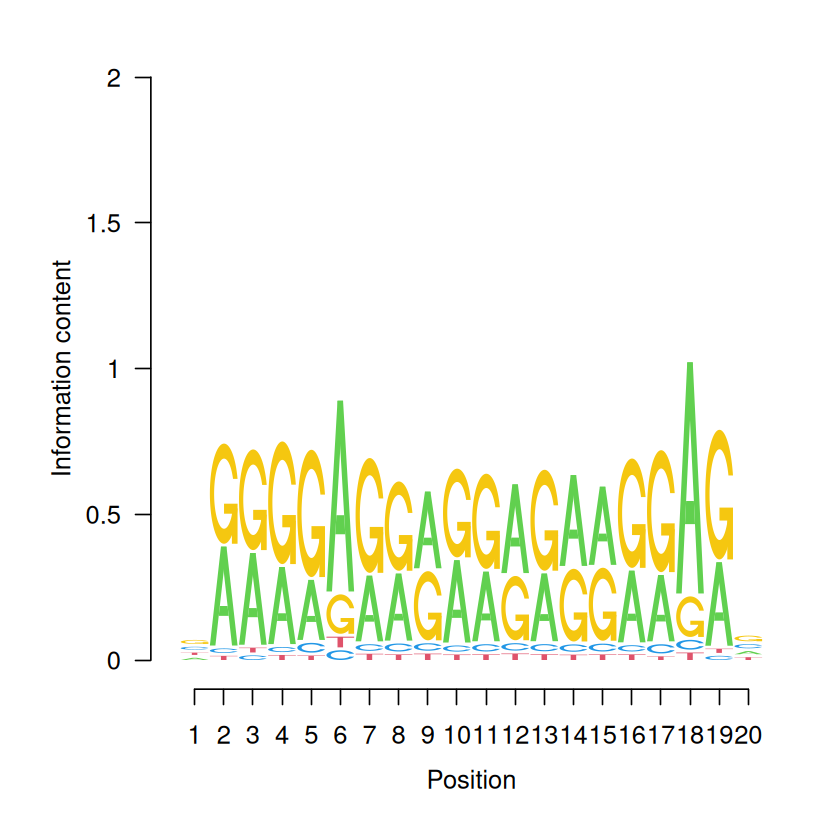

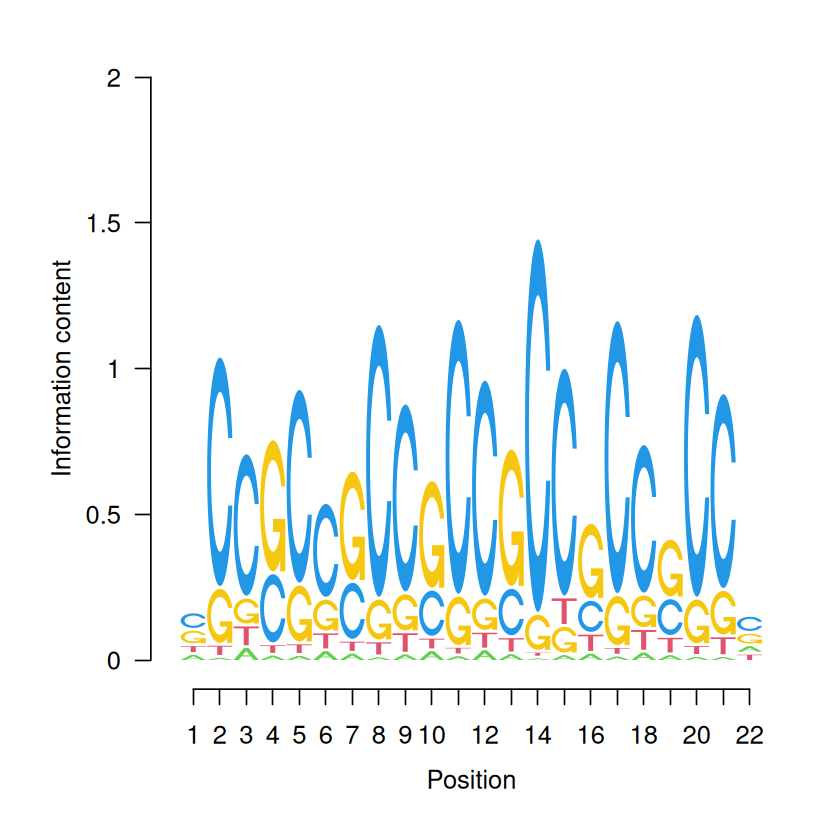

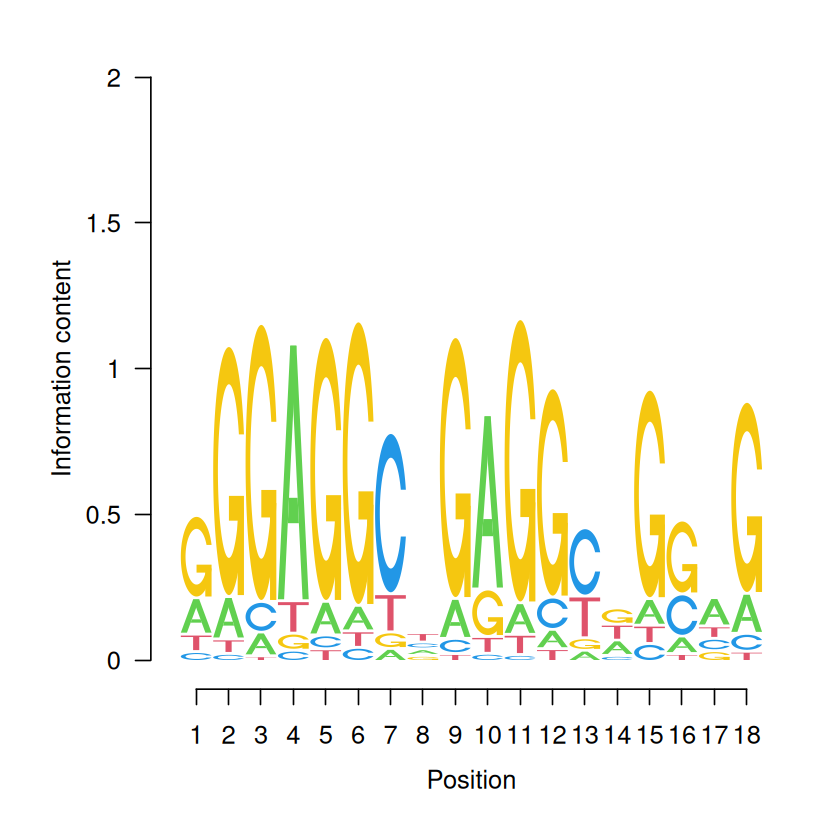

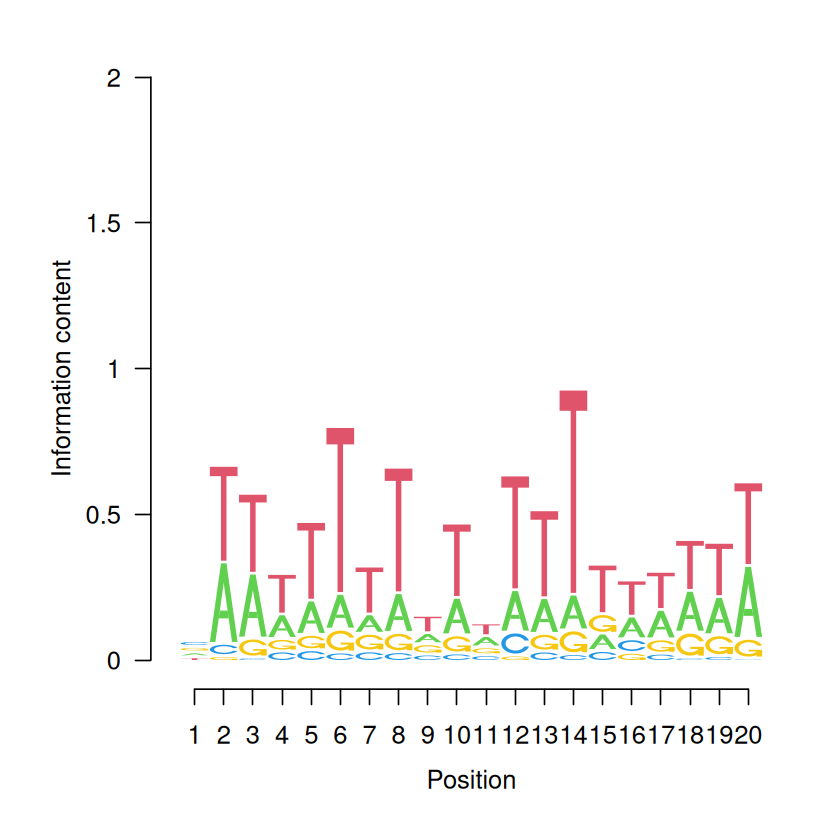

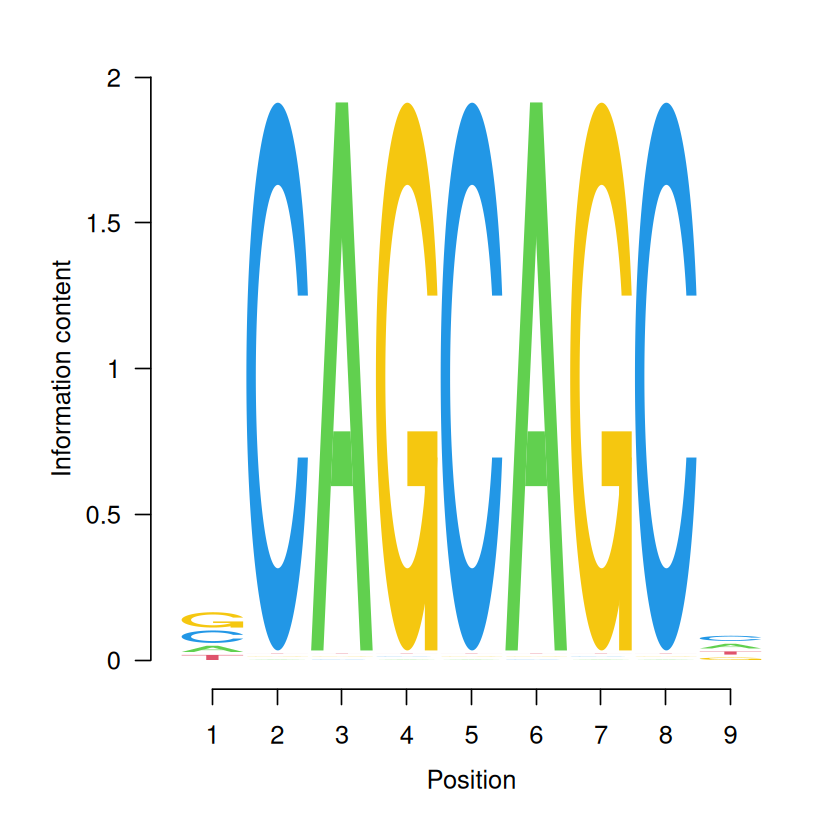

In [11]:
reverse_complement_pwm <- function(pwm) {
  # Reverse the columns (i.e., reverse the motif)
  pwm_rev <- pwm[, ncol(pwm):1]

  # Reorder the rows: A<->T, C<->G
  row_order <- match(c("T", "G", "C", "A"), rownames(pwm_rev))
  pwm_rc <- pwm_rev[row_order, ]
  rownames(pwm_rc) <- c("A", "C", "G", "T")  # restore row names

  return(pwm_rc)
}

seqLogo(reverse_complement_pwm(pwm_list_down$motif_1))
seqLogo(pwm_list_down$motif_2)
seqLogo(pwm_list_down$motif_3)
seqLogo(pwm_list_down$motif_4)
seqLogo(pwm_list_down$motif_5)

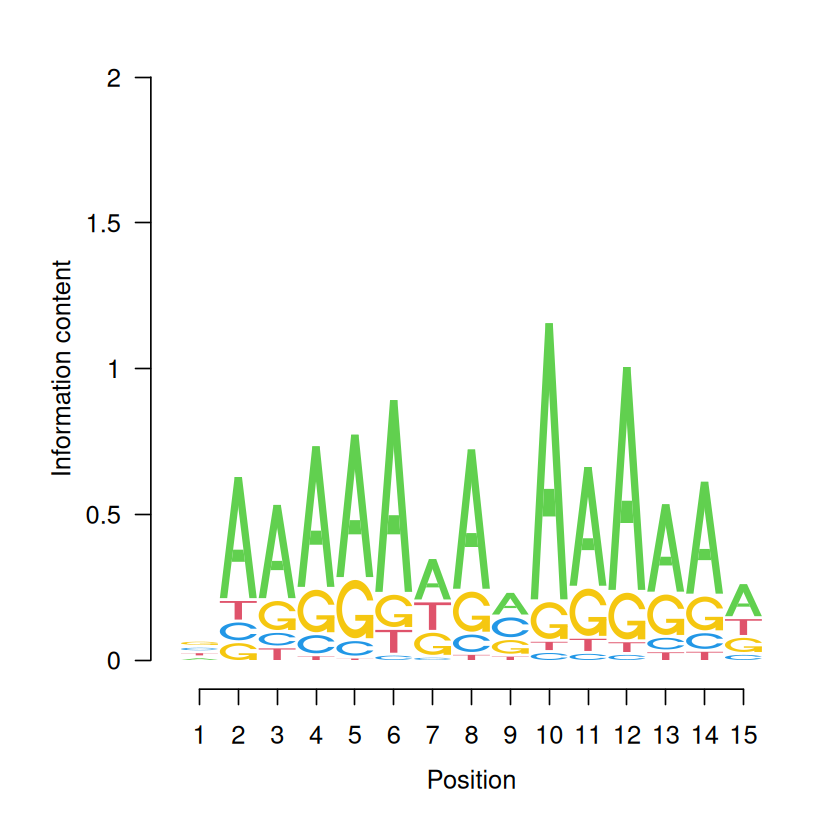

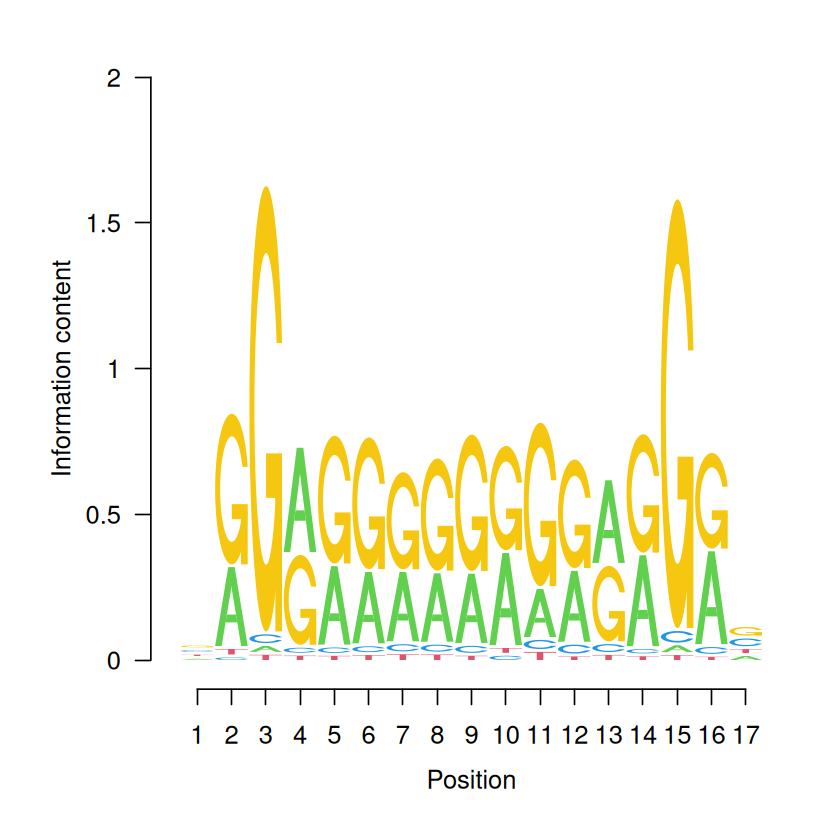

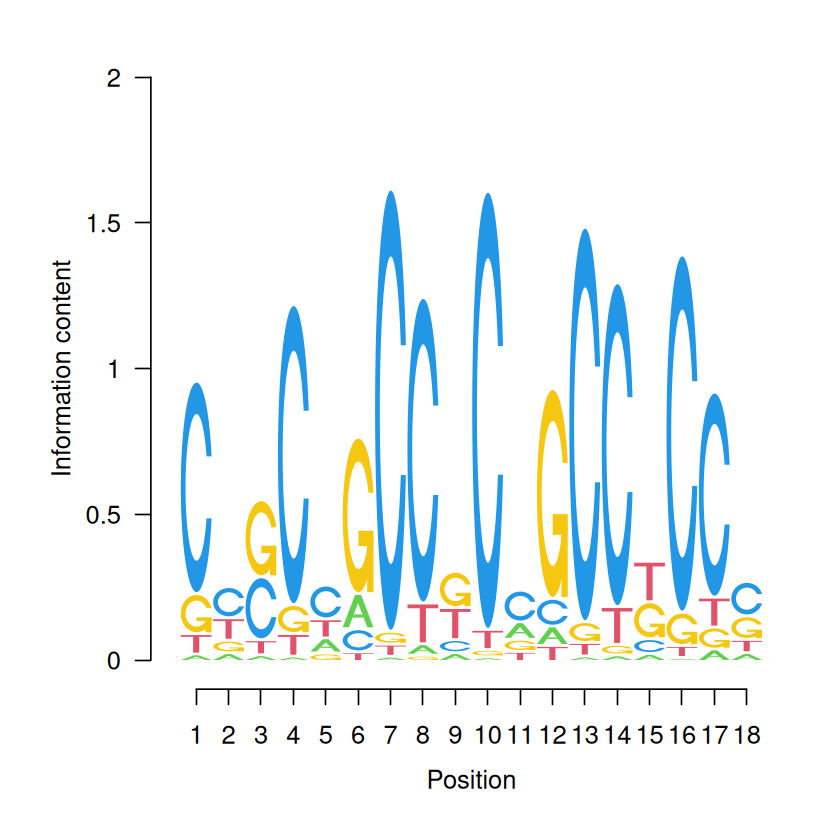

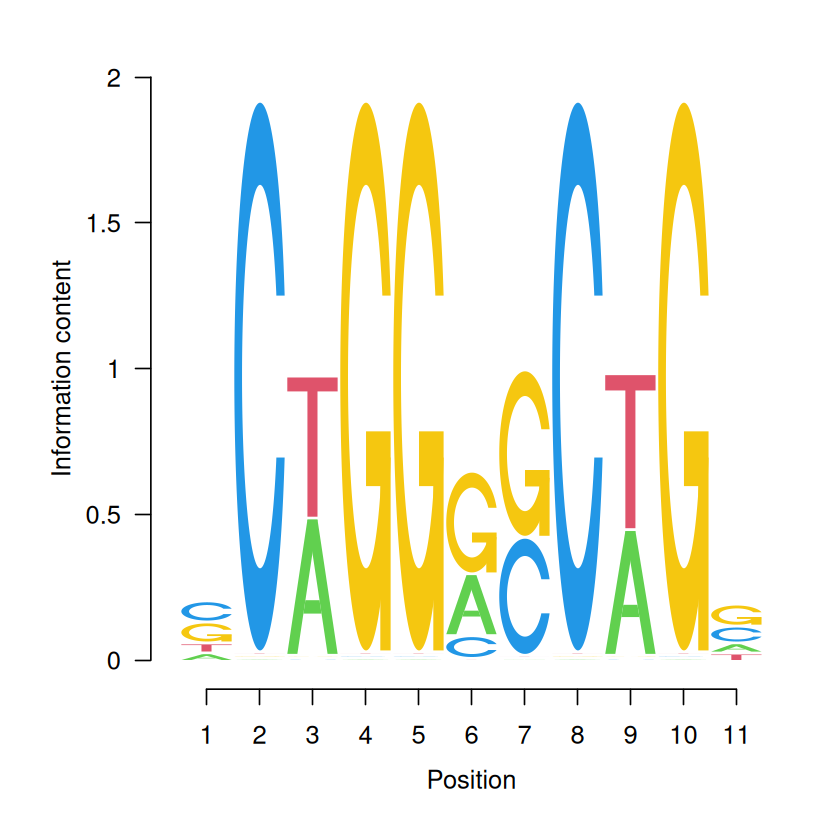

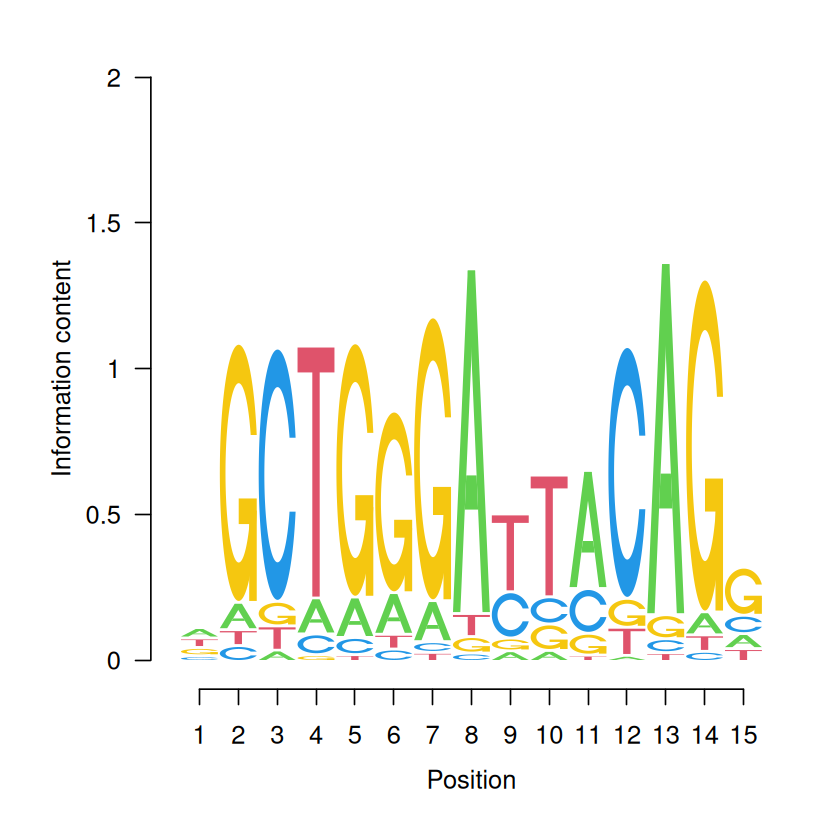

In [12]:
seqLogo(pwm_list_up$motif_1)
seqLogo(pwm_list_up$motif_2)
seqLogo(pwm_list_up$motif_3)
seqLogo(pwm_list_up$motif_4)
seqLogo(pwm_list_up$motif_5)

In [13]:
print("Similarity between motifs by using the statistics in universalmotif library")

[1] "Similarity between motifs by using the statistics in universalmotif library"


In [14]:
library(universalmotif)

# Function to properly convert PWM to universalmotif object
convert_to_universalmotif <- function(pwm_matrix, motif_name) {
    # Ensure the matrix has proper row names
    if(is.null(rownames(pwm_matrix))) {
        rownames(pwm_matrix) <- c("A", "C", "G", "T")
    }
    
    # Create universalmotif object
    create_motif(pwm_matrix, 
                 name = motif_name, 
                 type = "PWM",
                 alphabet = "DNA")
}

# Convert down-regulated motifs
motifs_down_um <- list()
for(motif_name in names(pwm_list_down)) {
    motifs_down_um[[motif_name]] <- convert_to_universalmotif(pwm_list_down[[motif_name]], 
                                                              paste0("Down_", motif_name))
}

# Convert up-regulated motifs  
motifs_up_um <- list()
for(motif_name in names(pwm_list_up)) {
    motifs_up_um[[motif_name]] <- convert_to_universalmotif(pwm_list_up[[motif_name]], 
                                                            paste0("Up_", motif_name))
}

print(paste("Created", length(motifs_down_um), "down-regulated motifs"))
print(paste("Created", length(motifs_up_um), "up-regulated motifs"))

Warning message in (function (motif, name = "new motif", altname = NA_character_, :
“subscript out of bounds (index 0 >= vector size 0)”
Warning message in (function (motif, name = "new motif", altname = NA_character_, :
“subscript out of bounds (index 0 >= vector size 0)”
Warning message in (function (motif, name = "new motif", altname = NA_character_, :
“subscript out of bounds (index 0 >= vector size 0)”
Warning message in (function (motif, name = "new motif", altname = NA_character_, :
“subscript out of bounds (index 0 >= vector size 0)”
Warning message in (function (motif, name = "new motif", altname = NA_character_, :
“subscript out of bounds (index 0 >= vector size 0)”
Warning message in (function (motif, name = "new motif", altname = NA_character_, :
“subscript out of bounds (index 0 >= vector size 0)”
Warning message in (function (motif, name = "new motif", altname = NA_character_, :
“subscript out of bounds (index 0 >= vector size 0)”
Warning message in (function (motif, name

[1] "Created 5 down-regulated motifs"
[1] "Created 5 up-regulated motifs"


In [15]:
# motifs_down_um
# motifs_up_um

In [16]:
# Combine all motifs for comparison
all_motifs_um <- c(motifs_down_um, motifs_up_um)

# Compare all motifs using different methods
comparison_pcc <- compare_motifs(all_motifs_um, method = "PCC")  # Pearson correlation
comparison_euclidean <- compare_motifs(all_motifs_um, method = "EUCL")  # Euclidean distance
comparison_kl <- compare_motifs(all_motifs_um, method = "KL")  # Kullback-Leibler

print("Pearson Correlation Comparison:")
print(round(comparison_pcc, 3))

[1] "Pearson Correlation Comparison:"
             Down_motif_1 Down_motif_2 Down_motif_3 Down_motif_4 Down_motif_5
Down_motif_1        1.000        0.455        0.870        0.199        0.341
Down_motif_2        0.455        1.000        0.559       -0.485        0.625
Down_motif_3        0.870        0.559        1.000       -0.007        0.722
Down_motif_4        0.199       -0.485       -0.007        1.000        0.068
Down_motif_5        0.341        0.625        0.722        0.068        1.000
Up_motif_1          0.662       -0.118        0.173        0.729        0.256
Up_motif_2          0.856        0.549        0.683        0.003        0.350
Up_motif_3          0.736        0.907        0.775       -0.178        0.669
Up_motif_4          0.511        0.606        0.731       -0.091        0.685
Up_motif_5          0.369        0.297        0.534        0.124        0.763
             Up_motif_1 Up_motif_2 Up_motif_3 Up_motif_4 Up_motif_5
Down_motif_1      0.662      0.856  

In [17]:
# Get indices for down and up motifs
num_down <- length(motifs_down_um)
num_up <- length(motifs_up_um)

# Extract cross-comparison (down vs up only)
down_vs_up_comparison <- comparison_pcc[1:num_down, (num_down + 1):(num_down + num_up)]

print("\nDown vs Up Motif Similarity Matrix:")
print(round(down_vs_up_comparison, 3))

# Set proper row and column names
rownames(down_vs_up_comparison) <- names(motifs_down_um)
colnames(down_vs_up_comparison) <- names(motifs_up_um)

[1] "\nDown vs Up Motif Similarity Matrix:"
             Up_motif_1 Up_motif_2 Up_motif_3 Up_motif_4 Up_motif_5
Down_motif_1      0.662      0.856      0.736      0.511      0.369
Down_motif_2     -0.118      0.549      0.907      0.606      0.297
Down_motif_3      0.173      0.683      0.775      0.731      0.534
Down_motif_4      0.729      0.003     -0.178     -0.091      0.124
Down_motif_5      0.256      0.350      0.669      0.685      0.763


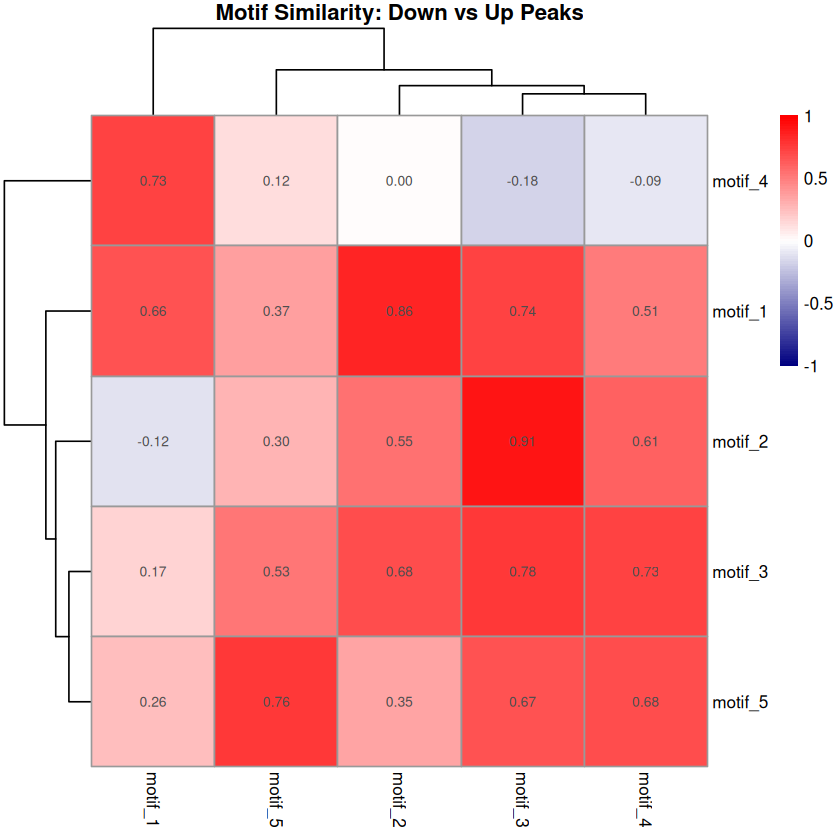

In [18]:
library(pheatmap)
library(RColorBrewer)

# Create heatmap
pheatmap(down_vs_up_comparison,
         main = "Motif Similarity: Down vs Up Peaks",
         color = colorRampPalette(c("navy", "white", "red"))(100),
         cluster_rows = TRUE,
         cluster_cols = TRUE,
         display_numbers = TRUE,
         number_format = "%.2f",
         fontsize_number = 8,
         breaks = seq(-1, 1, length.out = 101))

In [19]:
# Convert matrix to data frame for easier analysis
similarity_df <- expand.grid(Down_Motif = rownames(down_vs_up_comparison),
                            Up_Motif = colnames(down_vs_up_comparison),
                            stringsAsFactors = FALSE)

similarity_df$Similarity <- as.vector(down_vs_up_comparison)

# Sort by similarity
similarity_df <- similarity_df[order(similarity_df$Similarity, decreasing = TRUE), ]

print("Top 10 most similar motif pairs between conditions:")
print(head(similarity_df, 10))

print("\nTop 5 least similar motif pairs:")
print(tail(similarity_df, 5))

[1] "Top 10 most similar motif pairs between conditions:"
   Down_Motif Up_Motif Similarity
12    motif_2  motif_3  0.9065133
6     motif_1  motif_2  0.8563023
13    motif_3  motif_3  0.7752597
25    motif_5  motif_5  0.7626239
11    motif_1  motif_3  0.7355831
18    motif_3  motif_4  0.7314788
4     motif_4  motif_1  0.7294793
20    motif_5  motif_4  0.6845894
8     motif_3  motif_2  0.6832049
15    motif_5  motif_3  0.6687517
[1] "\nTop 5 least similar motif pairs:"
   Down_Motif Up_Motif   Similarity
24    motif_4  motif_5  0.124368595
9     motif_4  motif_2  0.002569537
19    motif_4  motif_4 -0.090861991
2     motif_2  motif_1 -0.117539002
14    motif_4  motif_3 -0.177664580


In [20]:
# Calculate summary statistics
summary_stats <- data.frame(
    Metric = c("Mean Similarity", "Max Similarity", "Min Similarity", 
               "Std Dev", "Pairs > 0.5", "Pairs > 0.7"),
    Value = c(
        round(mean(similarity_df$Similarity), 3),
        round(max(similarity_df$Similarity), 3),
        round(min(similarity_df$Similarity), 3),
        round(sd(similarity_df$Similarity), 3),
        sum(similarity_df$Similarity > 0.5),
        sum(similarity_df$Similarity > 0.7)
    )
)

print("Similarity Summary Statistics:")
print(summary_stats)

[1] "Similarity Summary Statistics:"
           Metric  Value
1 Mean Similarity  0.463
2  Max Similarity  0.907
3  Min Similarity -0.178
4         Std Dev  0.325
5     Pairs > 0.5 15.000
6     Pairs > 0.7  7.000


In [21]:
print("Similarity between motifs by using the statistics in motifstack library")

[1] "Similarity between motifs by using the statistics in motifstack library"


In [22]:

# Pearson Correlation of two PWMs (allow alignment)
pwm_similarity <- function(pwm1, pwm2) {
  min_len <- min(ncol(pwm1), ncol(pwm2))
  pwm1_trim <- pwm1[, 1:min_len]
  pwm2_trim <- pwm2[, 1:min_len]

  # Flatten the matrices into vectors and correlate
  cor(as.vector(pwm1_trim), as.vector(pwm2_trim))
}

In [23]:
# Create an empty matrix to store pairwise similarities
similarity_matrix <- matrix(NA, 
                            nrow = length(pwm_list_up), 
                            ncol = length(pwm_list_down),
                            dimnames = list(names(pwm_list_up), names(pwm_list_down)))

# Fill in the matrix
for (i in names(pwm_list_up)) {
  for (j in names(pwm_list_down)) {
    pwm_up <- pwm_list_up[[i]]
    pwm_down <- reverse_complement_pwm(pwm_list_down[[j]])  # reverse-complement down motifs
    similarity_matrix[i, j] <- pwm_similarity(pwm_up, pwm_down)
  }
}

# View matrix
print(round(similarity_matrix, 3))


        motif_1 motif_2 motif_3 motif_4 motif_5
motif_1   0.650  -0.211  -0.264   0.614  -0.241
motif_2   0.769   0.612  -0.265  -0.096   0.049
motif_3  -0.378   0.410   0.897  -0.411  -0.256
motif_4   0.237   0.082   0.081  -0.243  -0.161
motif_5   0.119   0.149  -0.133   0.042   0.391


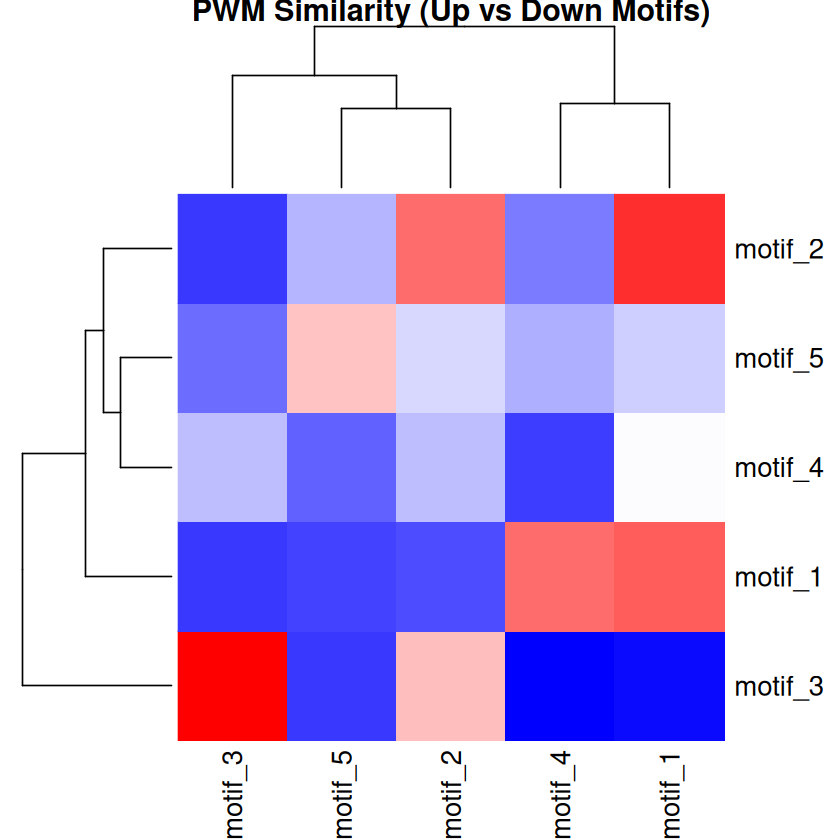

In [24]:
heatmap(similarity_matrix, 
        main = "PWM Similarity (Up vs Down Motifs)", 
        col = colorRampPalette(c("blue", "white", "red"))(100), 
        scale = "none")
